In [37]:
import pandas as pd
lien ="tableau_coeff.xlsx"
df = pd.read_excel(lien)

In [38]:
df

,Prix_de_vente,min,max,coeff,Unnamed: 4,Unnamed: 5
0,<20 000,0,20000,6500.000,NaN,NaN
1,20 000 - 30 000,20001,30000,7000.000,NaN,NaN
2,30 001 - 40 000,30001,40000,8500.000,NaN,NaN
3,40 001 - 50 000,40001,50000,0.145,NaN,NaN
4,50 001 - 60 000,50001,60000,0.130,NaN,NaN
5,60 001 - 70 000,60001,70000,0.115,NaN,NaN
6,70 001 - 90 000,70001,90000,0.110,NaN,NaN
7,90 001 - 120 000,90001,120000,0.095,NaN,NaN
8,120 001 - 150 000,120001,150000,0.090,NaN,NaN
9,150 001 - 180 000,150001,180000,0.085,NaN,NaN


In [5]:
def prix_nv(prix_net_vendeur):
    for i in range(0, len(df)):
        #print(prix_net_vendeur)
        #print(df['Prix_de_vente'][i])
        if prix_net_vendeur >= df['min'][i] and prix_net_vendeur <= df['max'][i]:
            coeff_temp = df['coeff'][i]
            prix_vente_temp = prix_net_vendeur + (prix_net_vendeur * df['coeff'][i])
            #print(f'Coeff temporaire : ' ,coeff_temp)
            #print(f'prix_vente temporaire : ',prix_vente_temp)
            if prix_net_vendeur + (prix_net_vendeur * df['coeff'][i]) > df['min'][i+1] : 
                prix_vente = prix_net_vendeur + (prix_net_vendeur * df['coeff'][i+1])
                coeff = df['coeff'][i+1]
                return coeff, prix_vente
                #print(prix_vente, df['coeff'][i+1])
                #print(prix_net_vendeur)
                #print(f'Coeff : ' ,df['coeff'][i+1])
                #print(f'prix_vente : ',prix_vente)
            else :
                return coeff_temp, prix_vente_temp
                #print(prix_net_vendeur)
                #print(f'Coeff temporaire : ' ,coeff_temp)
                #print(f'prix_vente temporaire : ',prix_vente_temp)

In [6]:
prix_net_vendeur = int(input("Inserez le prix net_vendeur"))

print(prix_nv(prix_net_vendeur)[0], prix_nv(prix_net_vendeur)[1])

0.08 179280.0


<Axes: xlabel='Prix net vendeur', ylabel='Prix de vente'>

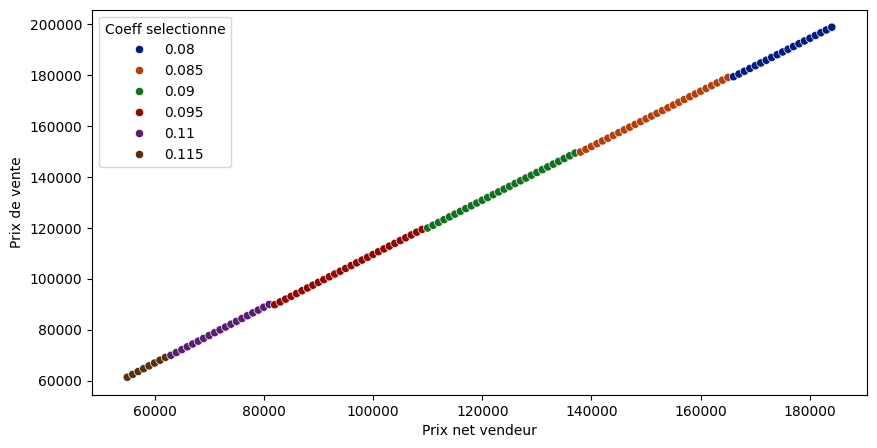

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt


Prix_net_vendeur = []
Coeff_selectionne = []
Prix_de_vente = []

for i in range(55_000,185_000, 1000):
    prix_net_vendeur = Prix_net_vendeur.append(i)
    Coeff_selectionne.append(prix_nv(i)[0])
    Prix_de_vente.append(prix_nv(i)[1])


df_analyse= pd.DataFrame({
    "Prix net vendeur" : Prix_net_vendeur,
    "Coeff selectionne" : Coeff_selectionne,
    "Prix de vente" : Prix_de_vente
})



plt.figure(figsize=(10,5))
sns.scatterplot(df_analyse, x= 'Prix net vendeur' , y = 'Prix de vente', hue= 'Coeff selectionne', palette='dark' )

<Axes: xlabel='Prix net vendeur', ylabel='Prix de vente'>

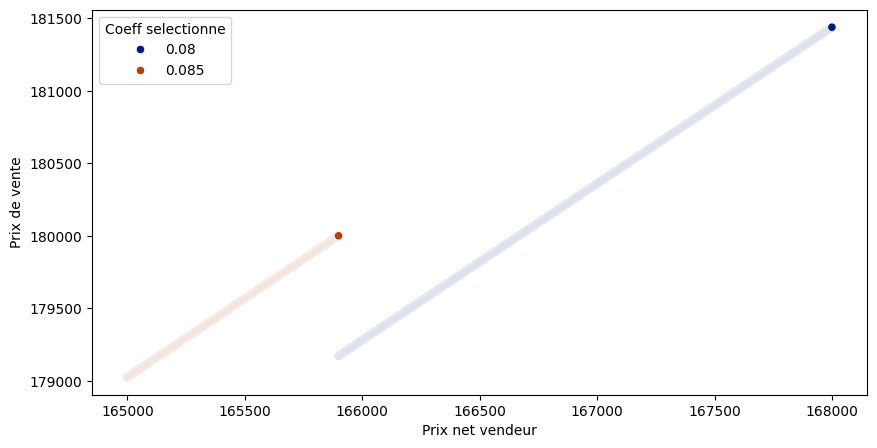

In [29]:

Prix_net_vendeur = []
Coeff_selectionne = []
Prix_de_vente = []

for i in range(165_000,168_000, 1):
    prix_net_vendeur = Prix_net_vendeur.append(i)
    Coeff_selectionne.append(prix_nv(i)[0])
    Prix_de_vente.append(prix_nv(i)[1])


df_analyse= pd.DataFrame({
    "Prix net vendeur" : Prix_net_vendeur,
    "Coeff selectionne" : Coeff_selectionne,
    "Prix de vente" : Prix_de_vente
})



plt.figure(figsize=(10,5))
sns.scatterplot(df_analyse, x= 'Prix net vendeur' , y = 'Prix de vente', hue= 'Coeff selectionne', palette='dark' )

In [33]:
print(prix_nv(165899)[0])
print(prix_nv(165899)[1])

0.085
180000.415


In [35]:
print(prix_nv(165900)[0])
print(prix_nv(165900)[1])

0.08
179172.0


In [36]:
print((prix_nv(165899)[1]) - (prix_nv(165900)[1]))

828.4150000000081
